In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 500

# Generate synthetic data
age = np.random.randint(18, 65, num_samples)
BMI = np.round(np.random.normal(25, 5, num_samples), 1)  # Normally distributed BMI
physical_activity = np.random.randint(0, 7, num_samples)  # Days per week
chronic_conditions = np.random.randint(0, 4, num_samples)  # Number of chronic illnesses
mental_health_score = np.random.randint(1, 10, num_samples)  # 1 (poor) to 10 (excellent)
diet_quality = np.random.randint(1, 10, num_samples)  # 1 (poor) to 10 (excellent)
socioeconomic_status = np.random.choice(['Low', 'Middle', 'High'], num_samples)
access_to_healthcare = np.random.choice(['Poor', 'Average', 'Good'], num_samples)
health_preferences = np.random.choice(['Preventive', 'Treatment-focused', 'Holistic'], num_samples)

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'BMI': BMI,
    'Physical_Activity': physical_activity,
    'Chronic_Conditions': chronic_conditions,
    'Mental_Health_Score': mental_health_score,
    'Diet_Quality': diet_quality,
    'Socioeconomic_Status': socioeconomic_status,
    'Access_to_Healthcare': access_to_healthcare,
    'Health_Preferences': health_preferences
})

# Save to CSV
df.to_csv("women_health_data.csv", index=False)

# Display first few rows
df.head()


,Age,BMI,Physical_Activity,Chronic_Conditions,Mental_Health_Score,Diet_Quality,Socioeconomic_Status,Access_to_Healthcare,Health_Preferences
0,56,35.7,4,1,8,4,High,Poor,Preventive
1,46,15.2,0,1,1,2,Low,Poor,Holistic
2,32,24.2,6,2,8,3,Low,Average,Treatment-focused
3,60,27.9,4,1,4,1,Low,Average,Holistic
4,25,26.4,5,1,4,6,High,Poor,Preventive


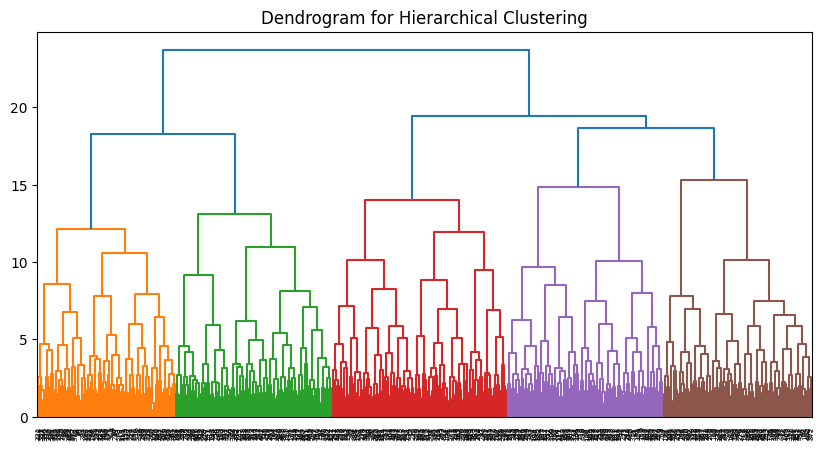

,Age,BMI,Physical_Activity,Chronic_Conditions,Mental_Health_Score,Diet_Quality,Socioeconomic_Status,Access_to_Healthcare,Health_Preferences,HC_Cluster,GMM_Cluster
0,1.100655,2.175888,0.526705,-0.429611,1.191222,-0.426611,0,2,1,0,0
1,0.353029,-1.977808,-1.475976,-0.429611,-1.590150,-1.195279,1,2,0,2,0
2,-0.693647,-0.154234,1.528046,0.476741,1.191222,-0.810945,1,0,2,1,2
3,1.399705,0.595458,0.526705,-0.429611,-0.398134,-1.579613,1,0,0,0,0
4,-1.216985,0.291529,1.027376,-0.429611,-0.398134,0.342057,0,2,1,1,1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

# Set seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 500

# Generate synthetic data
age = np.random.randint(18, 65, num_samples)
BMI = np.round(np.random.normal(25, 5, num_samples), 1)  # Normally distributed BMI
physical_activity = np.random.randint(0, 7, num_samples)  # Days per week
chronic_conditions = np.random.randint(0, 4, num_samples)  # Number of chronic illnesses
mental_health_score = np.random.randint(1, 10, num_samples)  # 1 (poor) to 10 (excellent)
diet_quality = np.random.randint(1, 10, num_samples)  # 1 (poor) to 10 (excellent)
socioeconomic_status = np.random.choice(['Low', 'Middle', 'High'], num_samples)
access_to_healthcare = np.random.choice(['Poor', 'Average', 'Good'], num_samples)
health_preferences = np.random.choice(['Preventive', 'Treatment-focused', 'Holistic'], num_samples)

# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'BMI': BMI,
    'Physical_Activity': physical_activity,
    'Chronic_Conditions': chronic_conditions,
    'Mental_Health_Score': mental_health_score,
    'Diet_Quality': diet_quality,
    'Socioeconomic_Status': socioeconomic_status,
    'Access_to_Healthcare': access_to_healthcare,
    'Health_Preferences': health_preferences
})

# Encoding categorical variables
le = LabelEncoder()
df['Socioeconomic_Status'] = le.fit_transform(df['Socioeconomic_Status'])
df['Access_to_Healthcare'] = le.fit_transform(df['Access_to_Healthcare'])
df['Health_Preferences'] = le.fit_transform(df['Health_Preferences'])

# Standardizing numerical features
scaler = StandardScaler()
numeric_cols = ['Age', 'BMI', 'Physical_Activity', 'Chronic_Conditions', 'Mental_Health_Score', 'Diet_Quality']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Hierarchical Clustering
linked = linkage(df, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['HC_Cluster'] = hc.fit_predict(df)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df[numeric_cols])

# Save clustered data
df.to_csv("women_health_clustered_data.csv", index=False)

# Display first few rows
df.head()
